In [45]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline                      
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [46]:
train=pd.read_csv('C:\\Users\\aa\\Desktop\\project files\\ride rating prediction\\train.csv')

In [47]:
test=pd.read_csv('C:\\Users\\aa\\Desktop\\project files\\ride rating prediction\\test.csv')

In [48]:
train.drop(["creation_date"],axis=1,inplace=True)

In [49]:
test.drop(["creation_date"],axis=1,inplace=True)

In [50]:
train.head(2)

,index,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1


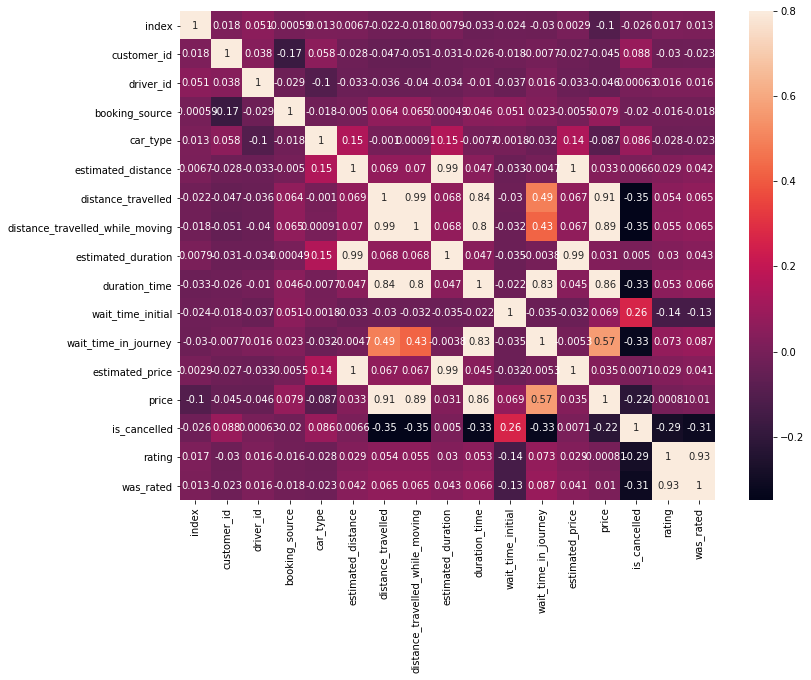

In [51]:
corrmat = train.corr(method = 'spearman')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

In [52]:
train.head(2)

,index,customer_id,driver_id,booking_source,car_type,estimated_distance,distance_travelled,distance_travelled_while_moving,estimated_duration,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled,rating,was_rated
0,0,52400320,1838640,1,1,0.0,7.28666,7.17712,0,11,18,2,0.0,17.375184,0,4,1
1,1,29858456,1793472,1,1,0.0,1.25836,1.05664,0,4,1,1,0.0,8.507064,0,4,1


In [53]:
x=train.iloc[:,[3,4,6,7,9,10,11,12,13,14]]

In [54]:
y=train.iloc[:,[15]]

In [58]:
x.head(2)

,booking_source,car_type,distance_travelled,distance_travelled_while_moving,duration_time,wait_time_initial,wait_time_in_journey,estimated_price,price,is_cancelled
0,1,1,7.28666,7.17712,11,18,2,0.0,17.375184,0
1,1,1,1.25836,1.05664,4,1,1,0.0,8.507064,0


In [59]:
y.head(2)

,rating
0,4
1,4


In [60]:
z=test.iloc[:,[3,4,6,7,9,10,11,12,13,14]]

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
classifier = LogisticRegression(random_state = 0)

In [35]:
classifier.fit(x, y)

C:\Users\aa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\aa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aa\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [36]:
classifier.score(x,y)

0.6361803339662901

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
model = RandomForestClassifier(max_depth=9, random_state=None,max_features='auto',max_leaf_nodes=5,n_estimators=105,criterion='gini')


In [63]:
model.fit(x, y)

C:\Users\aa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=105, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
model.score(x,y)

0.6357105103459076

In [39]:
pm=pd.DataFrame(model.predict(z))

In [40]:
pm.head(2)

,0
0,5
1,5


In [43]:
test['pm']=pm

In [44]:
test.pm.value_counts()

5    16421
0      780
Name: pm, dtype: int64